In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import glm
import numpy as np
import statsmodels.formula.api as smf

Index(['Unnamed: 0', 'index', 'switch', 'arsenic', 'distance', 'association',
       'education'],
      dtype='object')


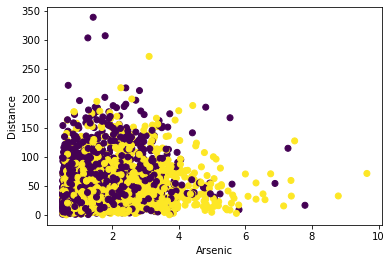

In [2]:
#df=pd.read_csv("http://www.stat.columbia.edu/~gelman/arm/examples/arsenic/wells.dat")
#df.to_csv('bangladesh_wells.csv')
#,usecols=['Unnamed','switch','arsenic','distance','association','education']
#sep="\s+"
df=pd.read_csv('bangladesh_wells2.csv')
df.reset_index()
print(df.columns)
plt.scatter(data=df,x='arsenic',y='distance',c='switch')
plt.xlabel('Arsenic')
plt.ylabel('Distance')
plt.show()

#df=pd.DataFrame(columns=['index','switch','arsenic','distance','association','education'])
#columns=df.columns

#with  open("bangladesh_wells.csv", "r") as file1:
#    line=file1.readline()
#    line=file1.readline()
#    while line:
#        buff1,buff2=line.split(",")
#        elements=buff2.split(" ")
#        elements[5]=int(elements[5])
#        a_series = pd.Series(elements, index = df.columns)
#        df=df.append(a_series, ignore_index=True)
#        line=file1.readline()
#df.to_csv('bangladesh_wells2.csv')


In [3]:
model_formula='switch ~ arsenic'
#model_formula='switch ~ distance'

link_function = sm.families.links.logit()
model_family = sm.families.Binomial(link = link_function)


wells_fit = glm(formula = model_formula, 
                 data = df, 
                 family = model_family).fit()

# View the results of the wells_fit model
print(wells_fit.summary())

# Extract coefficients from the fitted model wells_fit
intercept, slope = wells_fit.params

# Print coefficients
print('Intercept =', intercept)
print('Slope =', slope)

# Extract and print confidence intervals
print(wells_fit.conf_int())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3020
Model:                            GLM   Df Residuals:                     3018
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.3
Date:                Mon, 15 Feb 2021   Deviance:                       4008.7
Time:                        15:08:11   Pearson chi2:                 3.04e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3055      0.070     -4.346      0.0

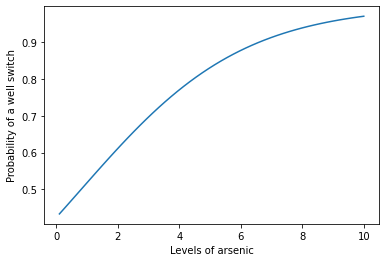

The higher the amounts of arsenic the more probable a well switch will occur


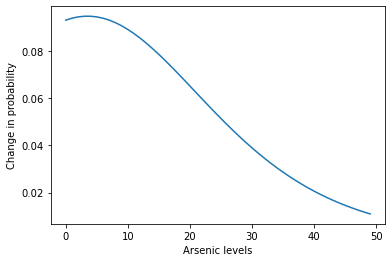

When arsenic is 10 there is the highest probablity of a well switch
odds: 
 Intercept    0.736734
arsenic      1.461021
dtype: float64


In [4]:
df2=pd.DataFrame()
df2['arsenic']=np.linspace(.1,10,50)
df2['arsenic2']=df2['arsenic']**2

prediction=wells_fit.predict(df2)

plt.plot(df2['arsenic'],prediction,label='Switch well')
#plt.plot(df2['distance'],prediction,label='Switch well')
plt.ylabel("Probability of a well switch")
plt.xlabel("Levels of arsenic")
plt.show()

print("The higher the amounts of arsenic the more probable a well switch will occur")


x_values=np.linspace(.1,10,50)
intercept, slope = wells_fit.params

ic_prob=[]
for x in x_values:
    est_prob=np.exp(intercept + slope * x) / (1 + np.exp(intercept + slope * x))

    #compute the incremental change in estimated probablity given x
    ic_prob.append(slope * est_prob * (1-est_prob))
    
plt.plot(ic_prob)
plt.ylabel("Change in probability")
plt.xlabel("Arsenic levels")
plt.show()
print("When arsenic is 10 there is the highest probablity of a well switch")

print("odds: \n",np.exp(wells_fit.params))

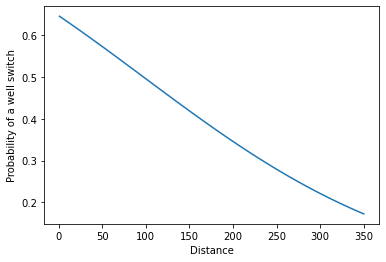

Distance Odds: Intercept    1.83301
distance     0.99380
dtype: float64


In [5]:
model_formula='switch ~ distance'

link_function = sm.families.links.logit()
model_family = sm.families.Binomial(link = link_function)


wells_distance_fit = glm(formula = model_formula, 
                 data = df, 
                 family = model_family).fit()

df2=pd.DataFrame()
df2['distance']=np.linspace(1,350,50)
#df3['distance2']=df3['distance']**2

predict_distance=wells_distance_fit.predict(df2)
plt.plot(df2['distance'],predict_distance,label='Distance Switch well')
plt.ylabel('Probability of a well switch')
plt.xlabel('Distance')
plt.show()

print('Distance Odds:', np.exp(wells_distance_fit.params))



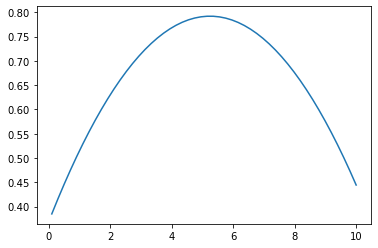

In [6]:
df['arsenic']=df['arsenic'].astype(float)
df['arsenic2']=df['arsenic']**2
df['distance']=df['distance'].astype(float)
df['distance2']=df['distance']**2
#print(df)

model_ols= smf.ols("switch ~ arsenic+arsenic2", data=df).fit()
#model_ols= smf.ols("switch ~ distance+distance2", data=df).fit()


df2=pd.DataFrame()
df2['arsenic']=np.linspace(.1,10,50)
df2['arsenic2']=df2['arsenic']**2

df3=pd.DataFrame()
df3['distance']=np.linspace(1,350,50)
df3['distance2']=df3['distance']**2

predict_arsenic=model_ols.predict(df2)
#predict_distance=model_ols.predict(df3)
plt.plot(df2['arsenic'],predict_arsenic,label='Arsenic Switch well')
#plt.plot(df3['distance'],predict_distance,label='Distance Switch well')
plt.show()

<AxesSubplot:>

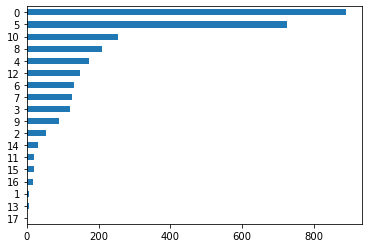

In [23]:
df['education'].value_counts().sort_values().plot.barh()